In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import glob

In [2]:
f05_path = os.path.join(os.getcwd(), 'lab4', 'f05.dat')
f05 = np.loadtxt(f05_path)

f10_path = os.path.join(os.getcwd(), 'lab4', 'f10.dat')
f10 = np.loadtxt(f10_path)

f15_path = os.path.join(os.getcwd(), 'lab4', 'f15.dat')
f15 = np.loadtxt(f15_path)

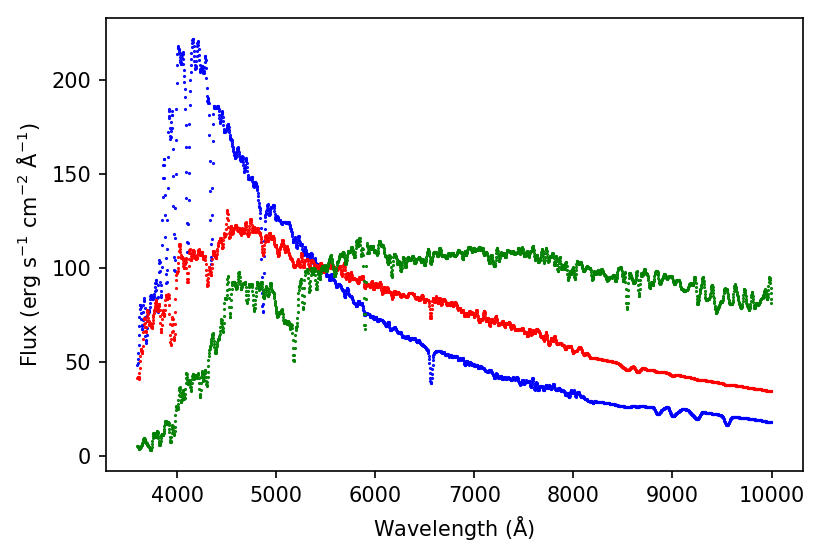

In [3]:
plt.figure(dpi=150)
plt.plot(f05[:,0], f05[:,1], 'b.', markersize=1)
plt.plot(f10[:,0], f10[:,1], 'r.', markersize=1)
plt.plot(f15[:,0], f15[:,1], 'g.', markersize=1)
plt.xlabel(r'Wavelength (${\rm \AA}$)')
plt.ylabel(r"Flux (erg s$^{-1}$ cm$^{-2}$ ${\rm \AA}^{-1}$)")
plt.show()

In [4]:
#calculate planck function in cgs
#divide output by 10^8 because we are using units of flux density with angstroms
def planck(lam_angstroms, A, T):
    lam = lam_angstroms * pow(10, -10) * 100 #convert to cm
    h = 6.626*pow(10, -27) #planck constant
    c = 3*pow(10, 10) #speed of light
    k = 1.38*pow(10, -16) #boltzmann constant
    exp = pow(np.e, h*c/(lam*k*T))
    return A*2*h*pow(c, 2)/pow(lam, 5)*(1/(exp-1)) / 1e8

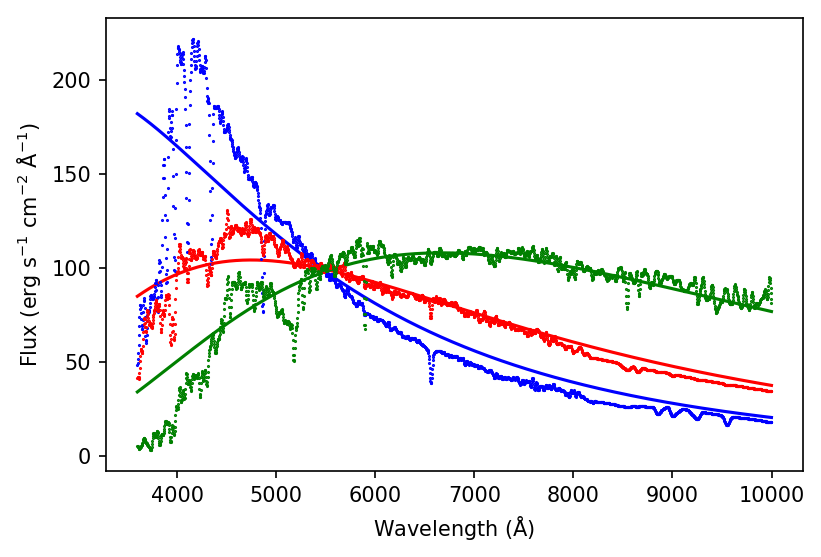

In [5]:
#normalized to 100, 5500 by eye

plt.figure(dpi=150)
plt.plot(f05[:,0], planck(f05[:,0], 6e-6, 9550), 'b')
plt.plot(f10[:,0], planck(f10[:,0], 3e-5, 6110), 'r')
plt.plot(f15[:,0], planck(f15[:,0], 1.7e-4, 4350), 'g')
plt.plot(f05[:,0], f05[:,1], 'b.', markersize=1)
plt.plot(f10[:,0], f10[:,1], 'r.', markersize=1)
plt.plot(f15[:,0], f15[:,1], 'g.', markersize=1)
plt.xlabel(r'Wavelength (${\rm \AA}$)')
plt.ylabel(r"Flux (erg s$^{-1}$ cm$^{-2}$ ${\rm \AA}^{-1}$)")
plt.show()

In [6]:
def integrate(f, a, b, N):
    x = np.linspace(a, b, N+1)
    delta_x = (b - a) / N
    return delta_x*np.sum(f(x[:N]))

In [7]:
#Reimann Sum
a = 0
b = 1
N = 1000
x = np.linspace(a, b, N+1)

print(x[0])
print(x[N])

0.0
1.0


In [8]:
#integral of sinx:
integrate(np.sin, a, b, N)

0.4592769203313145

In [9]:
#now with N=500:
integrate(np.sin, a, b, 500)

0.45885606991447747

In [10]:
#now with N=2000:
integrate(np.sin, a, b, 2000)

0.459487316808623

In [11]:
from scipy import interpolate

In [12]:
Flam05 = interpolate.interp1d(f05[:,0], f05[:,1], fill_value=0, bounds_error=False, kind='cubic')
Flam10 = interpolate.interp1d(f10[:,0], f10[:,1], fill_value=0, bounds_error=False, kind='cubic')
Flam15 = interpolate.interp1d(f15[:,0], f15[:,1], fill_value=0, bounds_error=False, kind='cubic')

In [13]:
B_path = os.path.join(os.getcwd(), 'lab4', 'Bfilt.dat')
B = np.loadtxt(B_path)
Bfilt = interpolate.interp1d(B[:,0], B[:,1], fill_value=0, bounds_error=False)

V_path = os.path.join(os.getcwd(), 'lab4', 'Vfilt.dat')
V = np.loadtxt(V_path)
Vfilt = interpolate.interp1d(V[:,0], V[:,1], fill_value=0, bounds_error=False)

In [14]:
#later: define sub function

def func_mult(lam, f1=Flam05, f2=Bfilt):
    return np.multiply(f1(lam), f2(lam))

In [15]:
#calculate F_B:
min_b = min(B[:,0])
max_b = max(B[:,0])
func_mult.__defaults__ = (Flam05, Bfilt)
F05_B = integrate(func_mult, min_b, max_b, 1000)
func_mult.__defaults__ = (Flam10, Bfilt)
F10_B = integrate(func_mult, min_b, max_b, 1000)
func_mult.__defaults__ = (Flam15, Bfilt)
F15_B = integrate(func_mult, min_b, max_b, 1000)
M05_B = -2.5*np.log10(F05_B)
M10_B = -2.5*np.log10(F10_B)
M15_B = -2.5*np.log10(F15_B)
print(M05_B)
print(M10_B)
print(M15_B)

-13.000064951912938
-12.522969475368136
-11.866684423236293


In [16]:
#calculate F_V:
min_v = min(V[:,0])
max_v = max(V[:,0])
func_mult.__defaults__ = (Flam05, Vfilt)
F05_V = integrate(func_mult, min_v, max_v, 1000)
func_mult.__defaults__ = (Flam10, Vfilt)
F10_V = integrate(func_mult, min_v, max_v, 1000)
func_mult.__defaults__ = (Flam15, Vfilt)
F15_V = integrate(func_mult, min_v, max_v, 1000)
M05_V = -2.5*np.log10(F05_V)
M10_V = -2.5*np.log10(F10_V)
M15_V = -2.5*np.log10(F15_V)
print(M05_V)
print(M10_V)
print(M15_V)

-12.360550526189325
-12.377088856531698
-12.313134420446513


In [17]:
evol_8_path = os.path.join(os.getcwd(), 'lab4', 'evol_M0.8.dat')
evol8 = np.loadtxt(evol_8_path)
evol_10_path = os.path.join(os.getcwd(), 'lab4', 'evol_M1.0.dat')
evol10 = np.loadtxt(evol_10_path)
evol_13_path = os.path.join(os.getcwd(), 'lab4', 'evol_M1.3.dat')
evol13 = np.loadtxt(evol_13_path)
evol_18_path = os.path.join(os.getcwd(), 'lab4', 'evol_M1.8.dat')
evol18 = np.loadtxt(evol_18_path)
evol_26_path = os.path.join(os.getcwd(), 'lab4', 'evol_M2.6.dat')
evol26 = np.loadtxt(evol_26_path)

In [18]:
print(evol8)

[[ 3.6272e+00 -2.7860e-01  3.9811e-03]
 [ 3.6270e+00 -2.8620e-01  4.0738e-03]
 [ 3.6267e+00 -2.9400e-01  4.1687e-03]
 ...
 [ 3.7136e+00 -3.6260e-01  1.2592e+01]
 [ 3.7142e+00 -3.5590e-01  1.2885e+01]
 [ 3.7148e+00 -3.4890e-01  1.3186e+01]]


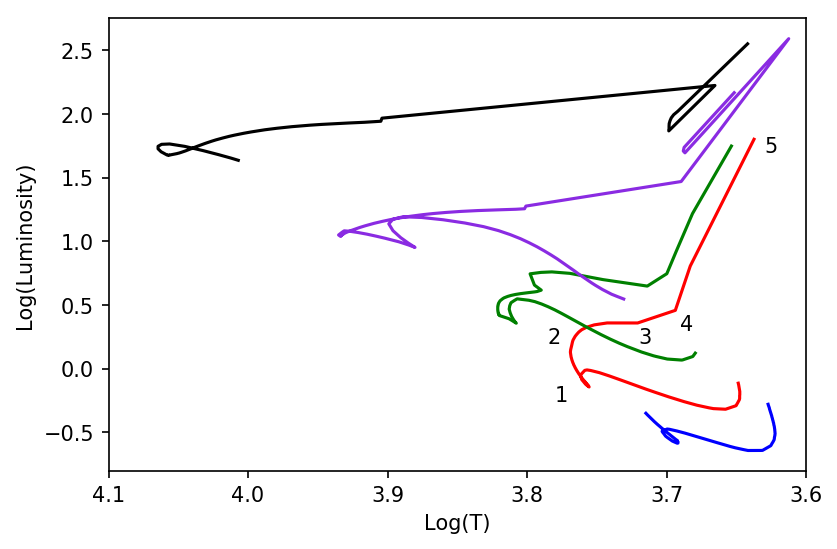

In [19]:
plt.figure(dpi=150)

plt.plot(evol8[:,0], evol8[:,1], 'b')
plt.plot(evol10[:,0], evol10[:,1], 'r')
plt.plot(evol13[:,0], evol13[:,1], 'g')
plt.plot(evol18[:,0], evol18[:,1], 'blueviolet')
plt.plot(evol26[:,0], evol26[:,1], 'k')

plt.text(3.78, -.26, "1")
plt.text(3.785, .2, "2")
plt.text(3.72, .2, "3")
plt.text(3.69, .3, "4")
plt.text(3.63, 1.7, "5")

plt.xlim(4.1, 3.6)
plt.xlabel("Log(T)")
plt.ylabel("Log(Luminosity)")
plt.show()

In [20]:
stars_10mill_path = os.path.join(os.getcwd(), 'lab4', 'stars_10_million.dat')
stars_10mill = np.loadtxt(stars_10mill_path)
stars_100mill_path = os.path.join(os.getcwd(), 'lab4', 'stars_100_million.dat')
stars_100mill = np.loadtxt(stars_100mill_path)
stars_600mill_path = os.path.join(os.getcwd(), 'lab4', 'stars_600_million.dat')
stars_600mill = np.loadtxt(stars_600mill_path)
stars_5bill_path = os.path.join(os.getcwd(), 'lab4', 'stars_5_billion.dat')
stars_5bill = np.loadtxt(stars_5bill_path)

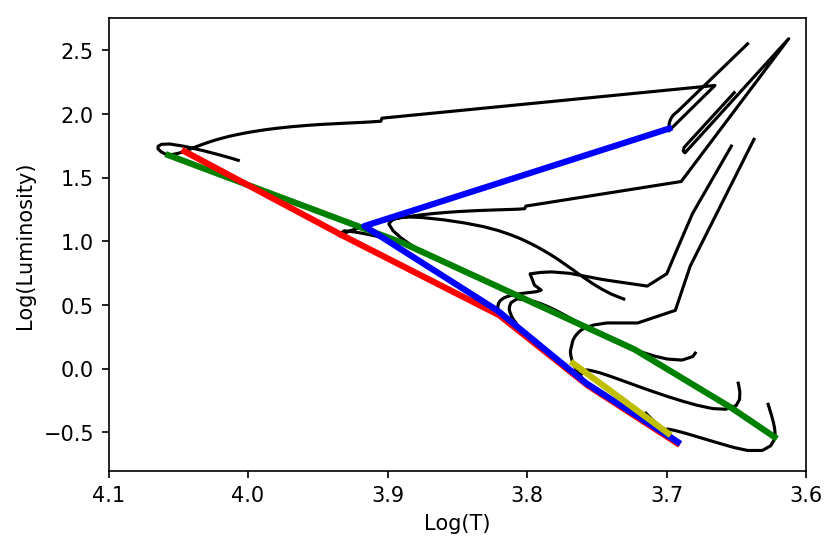

In [21]:
plt.figure(dpi=150)

plt.plot(evol8[:,0], evol8[:,1], 'k')
plt.plot(evol10[:,0], evol10[:,1], 'k')
plt.plot(evol13[:,0], evol13[:,1], 'k')
plt.plot(evol18[:,0], evol18[:,1], 'k')
plt.plot(evol26[:,0], evol26[:,1], 'k')
plt.plot(stars_10mill[:,0], stars_10mill[:,1], 'g', linewidth=3)
plt.plot(stars_100mill[:,0], stars_100mill[:,1], 'r', linewidth=3)
plt.plot(stars_600mill[:,0], stars_600mill[:,1], 'b', linewidth=3)
plt.plot(stars_5bill[:,0], stars_5bill[:,1], 'y', linewidth=3)

#change colors?
#sort points?

plt.xlim(4.1, 3.6)
plt.xlabel("Log(T)")
plt.ylabel("Log(Luminosity)")
plt.show()

In [22]:
m1_ints_path = os.path.join(os.getcwd(), 'lab4', 'm1_ints.dat')
m1_ints = np.loadtxt(m1_ints_path)

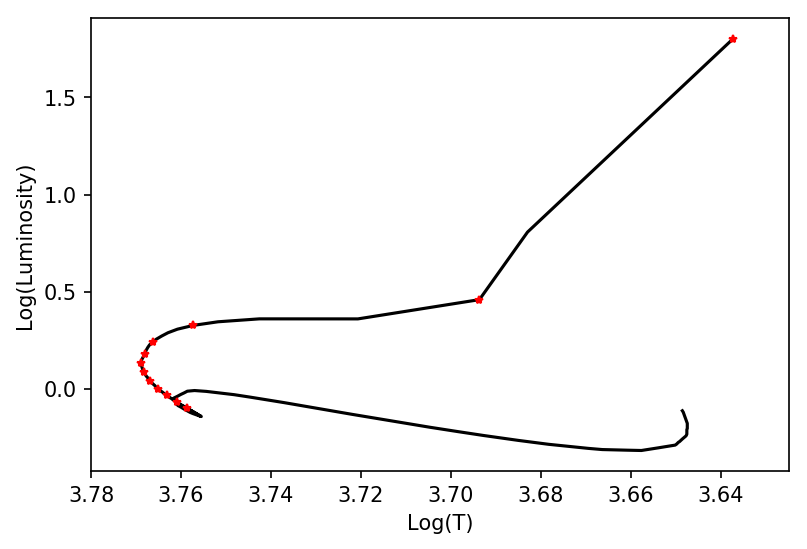

In [23]:
plt.figure(dpi=150)

plt.plot(evol10[:,0], evol10[:,1], 'k')
plt.plot(m1_ints[:,0], m1_ints[:,1], 'r*', markersize=4)
#only went to 11

plt.xlim(3.78, 3.625)
plt.xlabel("Log(T)")
plt.ylabel("Log(Luminosity)")
plt.show()

In [24]:
#create bias frame
biasimages = glob.glob(os.path.join(os.getcwd(), 'lab4', '20110428_raw', 'c_b_*.fits'))
bias = []
for img in biasimages:
    bias.append(fits.open(img)[0].data)
bias = np.mean(np.array(bias), axis=0)


biasimages = glob.glob(os.path.join(os.getcwd(), 'lab4', '20110428_raw', 'c_b_*.fits'))
bias = []
for img in biasimages:
    bias.append(fits.open(img)[0].data)
bias_median = np.median(np.array(bias), axis=0)

np.max(bias/bias_median)

3.1645056726094003

In [25]:
#create dark frame
darkimages = glob.glob(os.path.join(os.getcwd(), 'lab4', '20110428_raw', 'c_d_*.fits'))
dark = []
for img in darkimages:
    dark.append(fits.open(img)[0].data - bias)
dark = np.mean(np.array(dark), axis=0)

In [26]:
#find exposure times

dark_exptime = fits.open(darkimages[0])[0].header['EXPTIME']
print(dark_exptime)

300.0


In [27]:
#process images:

def reduce(sciimages, filter_):
    
    #correct for flat field
    #arbitrarily chose B filter, might need to change that
    #adjusted dark values to account for exposure time
    flatimages = glob.glob(os.path.join(os.getcwd(), 'lab4', '20110427_raw', 'c_f_*' + filter_ + '.fits'))
    
    flat_exptime = fits.open(flatimages[0])[0].header['EXPTIME']
    print(flat_exptime)

    flat = []
    for img in flatimages:
        flat.append(fits.open(img)[0].data - bias - dark*flat_exptime/dark_exptime)
        flat[-1] /= np.mean(flat[-1])
    flat = np.mean(np.array(flat), axis=0)
    flat /= np.mean(flat)
    
    sci_exptime = fits.open(sciimages[0])[0].header['EXPTIME']

    scistack = []
    for img in sciimages:
        hdu = fits.open(img)[0]
        sci = (hdu.data - bias - dark*sci_exptime/dark_exptime)/flat
        hdu.data = sci
        outfile = os.path.join(os.getcwd(), os.path.basename(img))
        hdu.writeto(outfile.replace('.fits','_cal.fits'), overwrite=True)
        scistack.append(sci)
    scistack = np.mean(np.array(scistack), axis=0)
    hdulist = fits.HDUList(fits.PrimaryHDU(scistack))
    outfile = os.path.join(os.getcwd(), 'mean_combined_image_' + filter_ + '.fits')
    hdulist.writeto(outfile, overwrite=True)
    
    #return flat

In [28]:
#B filter
#change other things to 428?

sciimagesB = glob.glob(os.path.join(os.getcwd(), 'lab4', '20110428_raw', 'c_e_*m51*B.fits'))
#check for other places where we accidentially got the ng files too
print(sciimagesB)
reduce(sciimagesB, 'B') #flat = 

['/Users/blakechellew/Documents/Physics/Phys134/lab4/20110428_raw/c_e_20110428_m51-002_B.fits', '/Users/blakechellew/Documents/Physics/Phys134/lab4/20110428_raw/c_e_20110428_m51-003_B.fits', '/Users/blakechellew/Documents/Physics/Phys134/lab4/20110428_raw/c_e_20110428_m51-001_B.fits']
3.0


/Users/blakechellew/Documents/Physics/Phys134/c_e_20110428_m51-001_B_cal.fits
(9, 1024, 1536)
(1024, 1536)
(9, 1024, 1536)


TypeError: Invalid dimensions for image data

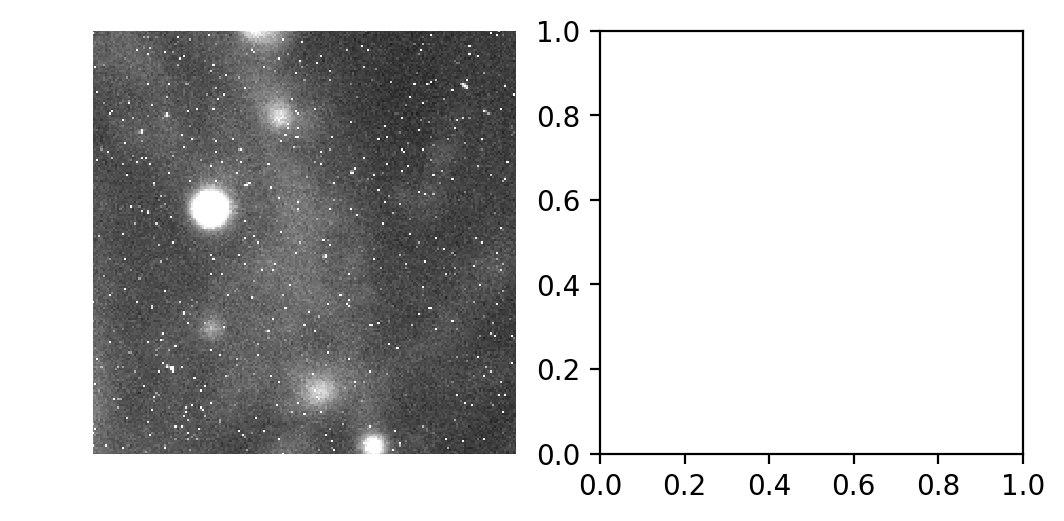

In [29]:
#display images before and after processing

imagefile1 = os.path.join(os.getcwd(), 'lab4', '20110428_raw', 'c_e_20110428_m51-001_B.fits')
image1 = fits.open(imagefile1)[0].data
clipped_image1 = np.clip(image1, 0, np.mean(image1)+1*np.std(image1))
image_scale1 = np.power(clipped_image1, 2)

imagefile2 = os.path.join(os.getcwd(), 'c_e_20110428_m51-001_B_cal.fits')
image2 = fits.open(imagefile2)[0].data
clipped_image2 = np.clip(image2, 0, np.mean(image2)+3*np.std(image2))
image_scale2 = np.power(clipped_image2, 2)

print(imagefile2)
print(image2.shape)
print(image1.shape)
print(clipped_image2.shape)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(clipped_image1, origin='lower', cmap='gray')
plt.xlim(800,1000)
plt.ylim(600,800)
plt.axis('off')

plt.subplot(1, 2, 2)
#plot stars from catalog on top of image
plt.imshow(clipped_image2, origin='lower', cmap='gray')
plt.xlim(800,1000)
plt.ylim(600,800)
plt.axis('off')

'''
plt.subplot(1, 3, 3)
#plot stars from catalog on top of image
plt.imshow(dark, origin='lower', cmap='gray')
plt.xlim(800,1000)
plt.ylim(600,800)
plt.axis('off')
'''
plt.show()

In [ ]:
sciimagesV = glob.glob(os.path.join(os.getcwd(), 'lab4', '20110428_raw', 'c_e_*V.fits'))
reduce(sciimagesV, 'V')

sciimagesI = glob.glob(os.path.join(os.getcwd(), 'lab4', '20110428_raw', 'c_e_*i.fits'))
reduce(sciimagesI, 'i')

In [ ]:
imagefileB = os.path.join(os.getcwd(), 'mean_combined_image_B.fits')
imageB = fits.open(imagefileB)[0].data

imagefileV= os.path.join(os.getcwd(), 'mean_combined_image_V.fits')
imageV = fits.open(imagefileV)[0].data

imagefileI = os.path.join(os.getcwd(), 'mean_combined_image_i.fits')
imageI = fits.open(imagefileI)[0].data

In [ ]:
from astropy.visualization import make_lupton_rgb

#avoid errors with log
imageB = np.clip(imageB, 0.001, np.max(imageB))
imageV = np.clip(imageV, 0.001, np.max(imageV))
imageI = np.clip(imageI, 0.001, np.max(imageI))

imageB = np.log(imageB)
imageV = np.log(imageV)
imageI = np.log(imageI)

image = make_lupton_rgb(imageI, imageV, imageB)

plt.figure(dpi=200)
plt.imshow(image, origin='lower')
plt.axis('off')
plt.show()